# Método de Euler para el movimiento de un péndulo
> Victor Hugo López Lugo

De acuerdo a la segunda ley de Newton, la ecuación de un péndulo se modela mediante la siguiente expresión:

<img src="pendulo.jpg" alt="pendulo" width="500"/>

$$\theta(t) ,\alpha(t)=\frac{d\omega(t)}{dt}=\frac{d \mathbf{^2\theta(t)}}{d \mathbf{t^2}}$$

Donde $\alpha(t)$ es la aceleración angular.

$$m*l^2  \frac{d^2\theta(t)}{dt^2}+mglsin(\theta)=0$$

$$\theta(0) = \theta_{inic}$$

$$\omega(0) = \omega_{inic}$$


Se identifica cada término de la ecuación al ponerla en la forma estandar:

 $$\mathbf{x}(t) = \;
   \begin{pmatrix}
      \theta(t) \\
      \frac{d\theta(t)}{dt}
   \end{pmatrix}$$
   

Proponiendo el siguiente cambio de variable:


$$ \mathbf{u}(t) = \;
   \begin{pmatrix}
      u_0 \\
      u_1
   \end{pmatrix} = \begin{pmatrix}
      \theta(t) \\
      \omega(t)
   \end{pmatrix}$$

Despejando a la ecuación diferencial de segundo orden, se tiene lo siguiente:

$$ \frac{d^2\theta(t)}{dt^2} = -\frac{g}{l} sin(\theta)$$

$$f(x,t) = -\frac{g}{l} sin(\theta)$$

Ahora, utilizando el cambio de variable antes propuesto, se tiene lo siguiente:

$$ u_0 = \theta  \longrightarrow     \frac{du_{0}}{dt}=\frac{d\theta(t)}{dt} = u_{1}  $$ 

Por otra parte:

$$u_{1}=  \frac{d\theta(t)}{dt} = \omega  \longrightarrow  \frac{du_1}{dt}=\frac{d\omega(t)}{dt} =\frac{d^2\theta(t)}{dt^2}= f(\mathbf{u},t) = -\frac{g}{l} sin(u_{0})$$

Entonces, la derivada del vector $\mathbf{u}$ se puede expresar en términos de las variables $u_{0}$ y $u_{1}$ gracias a las dos expresiones anteriores, por lo que:

 $$\mathbf{ \frac{du}{dt}} = \;
   \begin{pmatrix}
      \frac{du_0}{dt} \\
      \frac{du_1}{dt}
   \end{pmatrix} = F(\mathbf{u},t) = \begin{pmatrix}
      u_1 \\
      \frac{-g}{l} sin(u_{0})
   \end{pmatrix} $$
   
con condiciones iniciales:

$$ \mathbf{u}(0) = \begin{pmatrix}
      \theta_{inic} \\
      \omega_{inic}
   \end{pmatrix}$$
   
Por lo tanto para aplicar el método de Euler para resolver ecuaciones de segundo orden, es necesario realizar un cambio de

variable con el objetivo de trabajar solamente con una o más ecuaciones diferenciales de primer orden.


# Método de Euler

En matemáticas y computación, el método de Euler, llamado así en honor de Leonard Euler, es un procedimiento de integración numérica para resolver ecuaciones diferenciales ordinarias a partir de un valor incicial dado.

El método de Euler es uno de los métodos más usuales para resolver ecuaciones del siguiente tipo:

$$  \frac{dy}{dx} = f(x,y)$$
$$ y(x_{0}) = y_{0} $$
$$ y(x_{i}) = ? $$

Consiste en multiplicar los intervalos que va desde $x_{0}$ a $x_{f}$ en n subintervalos de ancho h, es decir:

$$ h = \frac{x_{f}-x_{0}}{n}$$
de manera que se obtiene un conjunto discreto de $n+1$  puntos: $x_{0},x_{1},x_{2}, \dots, x_{n} $ del intervalo de interés $[x_{0},x_{f}]$. Para cualquiera de estos puntos se cumple lo siguiente:

$$x_{i} = x_{0}+ih,   0 \le i \le n$$

La condición inicial $y(x_{0})=y_{0}$, representa el punto $P(x_{0},y_{0})$ por donde pasa la curva solución de la ecuación de la ecuación del planteamiento inicial, la cual se denotará como: $F(x,y) = y$. Ya teniendo el punto $P_{0}$ se puede evaluar la primera derivada de $F(x)$ en ese punto: por lo tanto:
$$F'(x) = \left.\frac{dy}{dx}\right|_P $$

Con esta información se traza una recta, aquella que pasa por $P_{0}$ y de pendiente $f(x_{0},y_{0})$. Esta recta aproxima $F(x)$ en una vecinidad de $x_{0}$. Tómese la recta como reemplazo de $F(x)$ y localícese en ella (la recta) el valor de $y$ correspondiente a $x_{1}$. Entonces, se puede deducir según la Gráfica:

<img src="Metodo_de_Euler.png" alt="Euler" width="800"/>

$$\frac{y_{1}-y_{0}}{x_{1}-x_{0}} = f(x_{0},y_{0}) $$

Se resuelve para $y_{1}:$

$y_{1} = y_{0}+hf(x_{0},y_{0})$

Es evidente que la ordenada $y_{1}$ calculada de esta manera no es igual a $F(x)$, pues existe un pequeño error. Sin embargo, el valor de $y_{1}$ sirve para que se aproxime $F'(x)$ en el punto $P= (x_{1},y_{1})$ y repetir el procedimiento anterior a fin de generar la sucesión de aproximaciones siguientes:

$y_{1} = y_{0}+hf(x_{0},y_{0}) \\
y_{2} = y_{1}+hf(x_{1},y_{1}) \\
y_{3} = y_{2}+hf(x_{2},y_{2}) \\
\vdots                        \\
y_{n} = y_{n-1}+hf(x_{n-1},y_{n-1})
$





# Implementación del código

In [2]:
using Plots

La posición promedio es: -0.0031830281499130248
La velocidad angular promedio es: -0.0038177341245185107


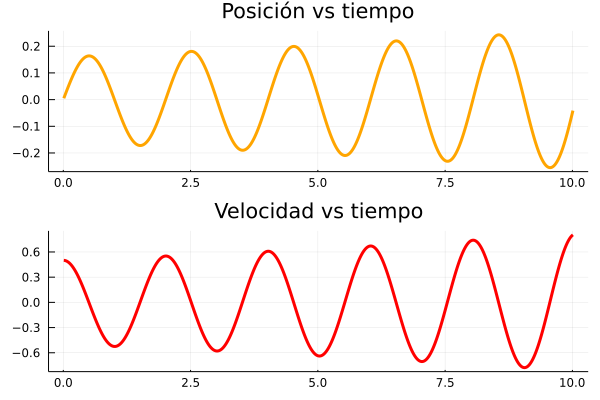

In [5]:
m = 1
l = 1
g = 9.81
#condicion inicial
t = 0
thetainc = 0
omegainc = 0.5
u = [thetainc,omegainc]
function F(u,t)
    #v = [u[2],(-g/l)*sin(u[1])]
    return [u[2],(-g/l)*sin(u[1])]
end

#solución

tsol = []
thetasol = [u[1]]
omegasol = [u[2]]
dt = 0.01
tfin = 10
while t<tfin
    u = u + F(u,t)*dt
    t = t + dt
    push!(thetasol,u[1])
    push!(omegasol,u[2])
    push!(tsol,t)
end

thetasol1= deleteat!(thetasol,1)
omegasol1= deleteat!(omegasol,1)

posición = sum(thetasol1)/length(thetasol1)  #Proomedio de la posicion 
velocidad = sum(omegasol1)/length(omegasol1)

println("La posición promedio es: ",posición )
println("La velocidad angular promedio es: ", velocidad)

p1 = plot(tsol,thetasol1,lw = 3, color = :orange, title = "Posición vs tiempo")
p2 = plot(tsol,omegasol1,lw=3,color = :red, title = "Velocidad vs tiempo")
plot(p1, p2, legend = false, layout = (2, 1))

#savefig("movimiento.pdf")
